# Test code polarimétrie #

Ici, je vais tester le programme de Samia servant à calculer les paramètres de polarimétrie d'une image.

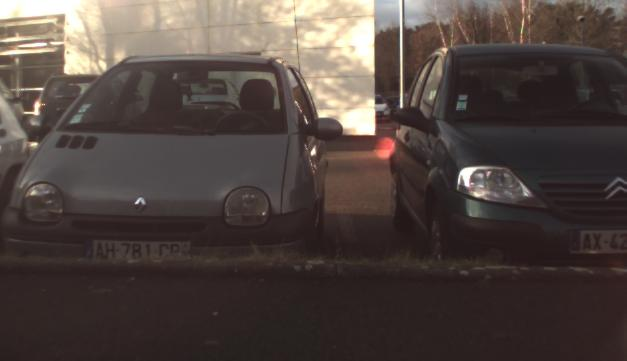

In [4]:
# Affichage des images sur lesquelles on va tester le programme 

from IPython.display import Image
Image('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00001/0.jpg')

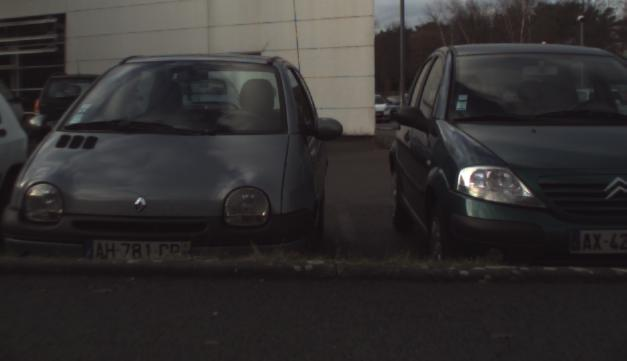

In [5]:
Image('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00001/45.jpg')

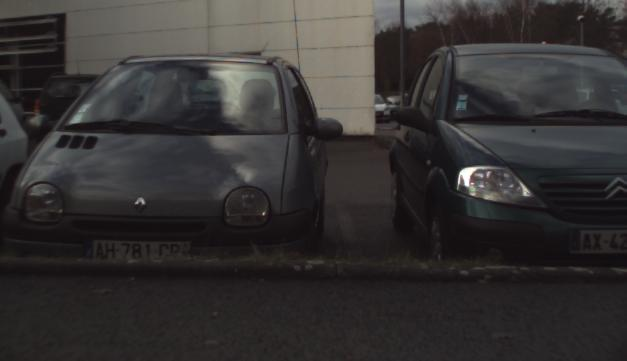

In [6]:
Image('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00001/90.jpg')

Exécutons maintenant le code pour observer ce qu'on obtient en sortie.

<Figure size 432x288 with 0 Axes>

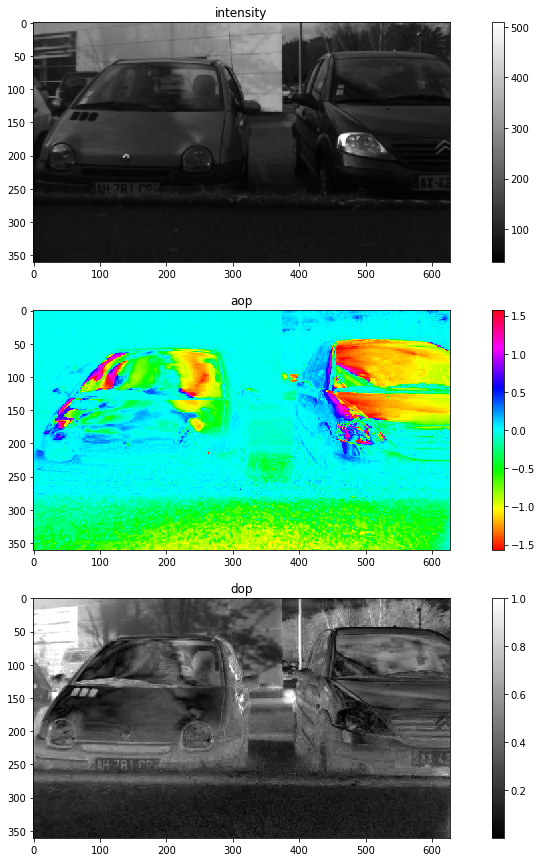

In [56]:
import numpy as np
import pylab as pl
import PIL 

# Calcul de la matrice P
def calcul_params_polarisation(imgs):
    P = {}
    P['theta'] = np.array([0, 60, 120]) *pl.pi/180
    P['T'] = np.array([0.5, 0.5, 0.5])
    P['P'] = np.array([1., 1., 1.])

    # Calcul de la matrice H, la matrice de calibration de polarisation en format 2darray

    M01s = P['T']
    M02s = np.cos(2*P['theta']) * P['T'] * P['P']
    M03s = np.sin(2*P['theta']) * P['T'] * P['P']
    Mt = np.array((M01s, M02s, M03s))
    H = pl.dot(pl.inv(pl.dot(Mt,Mt.T)), Mt)

    # Calcul des images de Stokes
    # img : liste d'images en format 2darrays

    s = [] # create an empty list
    for i in range(0,3):
        s.append(sum(H[i,j]*img for j, img in enumerate(imgs)))
    
    # Calcul du degré de polarisation de l'image et de l'angle de polarisation de l'image
    
    dop = np.sqrt(s[1]**2+s[2]**2)/s[0] # Deg polarisation
    aop = 0.5*np.arctan2(s[2], s[1]) # Angle polarisation
    
    # Tracé de la figure représentant les images de Stokes
    
    pl.figure(1)
    pl.figure(figsize=(15,15))
    #pl.figure(figsize=(15, 45))
    pl.clf()
    pl.subplot(3,1,1)
    pl.imshow(s[0], cmap='gray')
    pl.title('intensity')
    pl.colorbar()
    pl.subplot(3,1,2)
    pl.imshow(aop, cmap='hsv')
    pl.title('aop')
    pl.colorbar()
    pl.subplot(3,1,3)
    dop[dop>1] = 1
    pl.imshow(dop, cmap='gray')
    pl.colorbar()
    pl.title('dop')
    
    """
    pts0 = np.float32([[970, 32], [357.5, 186.5], [176.9, 678.8], [777.2, 550]])
    pts1 = np.float32([[965.5, 31.9], [356.9, 186.1], [176.3, 679], [778.2, 548]])
    pts2 = np.float32([[970, 30.8], [357, 185.6], [177, 677.5], [778, 547.3]])

    M1 = cv2.getPerspectiveTransform(pts1, pts0)
    M2 = cv2.getPerspectiveTransform(pts2, pts0)

    nbr = imgs[0].shape[1]
    nbc = imgs[1].shape[0]

    imgs2 = [imgs[0]]
    imgs2.append(cv2.warpPerspective(imgs[1], M1, (nbr, nbc)))
    imgs2.append(cv2.warpPerspective(imgs[2], M2, (nbr, nbc)))

    s2 = im2stokes(imgs, H)
    aop, dop = stokes2adop(s2)
    pl.subplot(6,1,4)
    pl.imshow(s[0], cmap='gray')
    pl.title('intensity')
    pl.colorbar()
    pl.subplot(6,1,5)
    pl.imshow(aop, cmap='hsv')
    pl.title('aop')
    pl.colorbar()
    pl.subplot(6,1,6)
    dop[dop>1] = 1
    pl.imshow(dop, cmap='gray')
    pl.colorbar()
    pl.title('dop')"""
    
# Conversion d'une image en 2darray

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
# Chargement des images à traiter :

im1 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00001/0.jpg'))
im2 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00001/45.jpg'))
im3 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00001/90.jpg'))

gray_im1 = rgb2gray(im1)
gray_im2 = rgb2gray(im2)
gray_im3 = rgb2gray(im3)

imgs2 = [gray_im1, gray_im2, gray_im3] # Images en niveaux de gris
imgs = [im1, im2, im3] # Images en rgb

calcul_params_polarisation(imgs2)

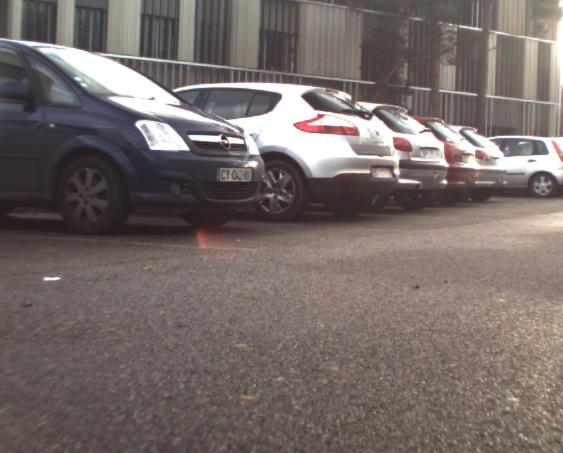

In [45]:
Image('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00003/0.jpg')

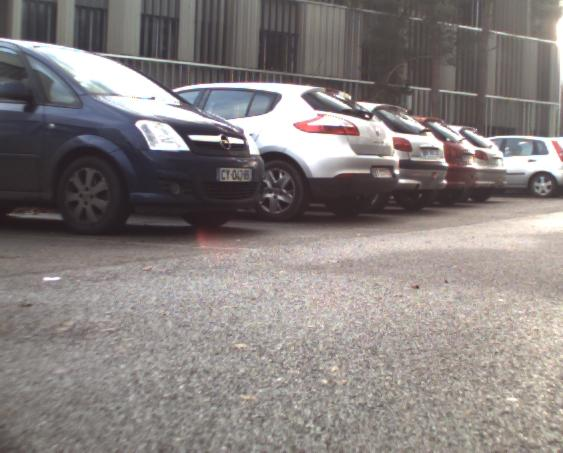

In [46]:
Image('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00003/45.jpg')

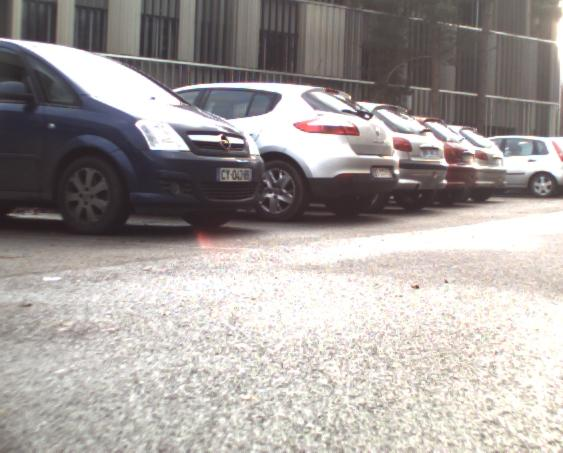

In [47]:
Image('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00003/90.jpg')

<Figure size 432x288 with 0 Axes>

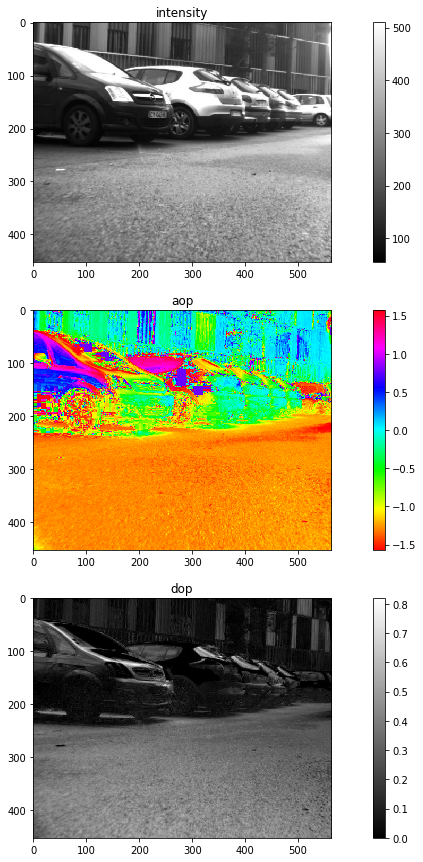

In [53]:
# Test sur une autre image avec des différences de luminosité plus marquées

im1 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00003/0.jpg'))
im2 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00003/45.jpg'))
im3 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00003/90.jpg'))

gray_im1 = rgb2gray(im1)
gray_im2 = rgb2gray(im2)
gray_im3 = rgb2gray(im3)

imgs2 = [gray_im1, gray_im2, gray_im3] # Images en niveaux de gris
imgs = [im1, im2, im3] # Images en rgb

calcul_params_polarisation(imgs2)

<Figure size 432x288 with 0 Axes>

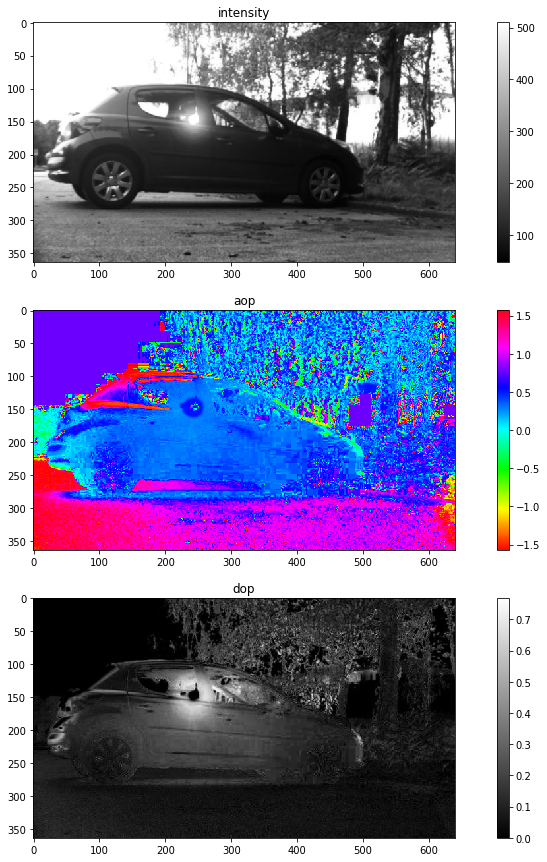

In [54]:
# Dernier test avec une image contenant un fort reflet du soleil

# Test sur une autre image avec des différences de luminosité plus marquées

im1 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00023/0.jpg'))
im2 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00023/45.jpg'))
im3 = np.asarray(PIL.Image.open('/Users/rblin/Downloads/polar_car_set/polar_car_set/snc00023/90.jpg'))

gray_im1 = rgb2gray(im1)
gray_im2 = rgb2gray(im2)
gray_im3 = rgb2gray(im3)

imgs2 = [gray_im1, gray_im2, gray_im3] # Images en niveaux de gris
imgs = [im1, im2, im3] # Images en rgb

calcul_params_polarisation(imgs2)